# Employee Attrition:

Employee Attrition is when employees leave the organization 
for any reason either voluntary or involuntary which can also include  
resignation, termination, death or retirement.



## Table of Content

1. Importing Necessary Packages


2. Accessing Data

3. Possible Issues with the dataset

4. Analysis

# 1. Importing Necessary Packages

In [88]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [89]:
# Import sql

import sqlite3

# Check
print('sql imported successfully')

sql imported successfully


In [90]:
# connect to Employee Attrition database
connect = sqlite3.connect("attr_data.db")

# Check connection
print("DB connected successfully \n", type(connect))

DB connected successfully 
 <class 'sqlite3.Connection'>


In [91]:
# Create a cursor object for execution of SQL queries
cursor = connect.cursor()

# Check that cursor is created successfully
print("Cursor created successfully \n", type(cursor))

Cursor created successfully 
 <class 'sqlite3.Cursor'>


In [92]:
# View table names
query = """
SELECT name
FROM sqlite_schema
WHERE type = 'table';
"""

# execute query
cursor.execute(query)

# View result
query_result = cursor.fetchall()
query_result

[('attrition_records',), ('sqlite_sequence',)]

In [93]:
# Select all from the sqlite_sequence
query = """
SELECT *
FROM sqlite_sequence"""

# Execute
cursor.execute(query)

# Output the query
query_output = cursor.fetchall()
query_output

[('attrition_records', 1470)]

In [94]:
df =pd.read_sql_query("SELECT * FROM attrition_records", connect)

# 2. Accessing Data

In [8]:
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
groupby_Gender = df.groupby("Gender")["Attrition"]
print(groupby_Gender.value_counts())

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64


In [11]:
df.isnull().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [12]:
# Number of rows in the data set
df.shape

(1470, 36)

In [13]:
# Checking the datatypes of the column
df.dtypes

id                           int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

In [14]:
# This cell is to view some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [15]:
# Unique values in the dataset
df.nunique()

id                          1470
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTi

In [16]:
# Describe the integer data set
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
# Number of rows in the data set
df.shape

(1470, 36)

# 3. Possible Issues with the dataset

1. Data Cleaning.

2. Dropping some column.

3. Some columns will be changed to enable them to be more desriptive.

### 3.1 Data Cleaning

In [33]:
# Copy dataset to preserve original data
df_to_clean = df.copy()
df_to_clean.head(5)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [32]:
# Check shape of new dataset
df_to_clean.shape

(1470, 36)

### 3.2 Dropping some column

In [34]:
# Dropping some column

df = df.drop("id", axis = 1)
df = df.drop("DailyRate", axis = 1)
df = df.drop("HourlyRate", axis = 1)
df = df.drop("MonthlyRate", axis = 1)
df = df.drop("EmployeeCount", axis = 1)
df = df.drop("StandardHours", axis = 1)
df = df.drop("EmployeeNumber", axis = 1)
df = df.drop("Over18", axis = 1)

In [35]:
df.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.001686,0.208034,0.010146,0.029820,0.509604,-0.004892,0.497855,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,0.008783,0.005303,-0.003669,-0.017014,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.021042,1.000000,-0.027128,0.042438,0.101589,-0.011296,0.094961,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
JobInvolvement,0.029820,0.008783,0.042438,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.005303,0.101589,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,0.015012,0.142501,-0.055699,0.149515,1.000000,-0.010238,-0.014095,0.052733,0.030075,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.040235,-0.011111,-0.031701,-0.017205,-0.034730,0.020002,-0.027269,-0.010238,1.000000,0.773550,-0.040490,0.007528,-0.020608,-0.005221,-0.003280,-0.035991,-0.001520,-0.022154,-0.011985


## 3.3 Some column values will be changed to enable them to be more descriptive.

Education


WorkLifeBalance


JobInvolvement


PerfromanceRating


EnvironmentSatisfaction


JobSatisfaction

### Education

1 'Below College'

2 'College'

3 'Bachelor'

4 'Master'

5 'Doctor'

In [24]:
counts = df['Education'].value_counts()
counts

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [25]:
var = df['Education'].value_counts().index
var

Int64Index([3, 4, 2, 1, 5], dtype='int64')

In [26]:
df['Education'].replace(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], [0,1,2,3,4], inplace=True)

### WorkLifeBalance

1 'Bad'

2 'Good'

3 'Better'

4 'Best'

In [21]:
counts = df['WorkLifeBalance'].value_counts()
counts

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [22]:
var = df['WorkLifeBalance'].value_counts().index
var

Int64Index([3, 2, 4, 1], dtype='int64')

In [115]:
df['WorkLifeBalance'].replace(['Bad', 'Good', 'Better', 'Best'], [0,1,2,3], inplace=True)

## JobSatisfaction


1 'Low'

2 'Medium'

3 'High'

4 'Very High'

In [127]:
counts = df['JobSatisfaction'].value_counts()
counts

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [128]:
var = df['JobSatisfaction'].value_counts().index
var

Int64Index([4, 3, 1, 2], dtype='int64')

In [129]:
df['JobSatisfaction'].replace(['Bad', 'Good', 'Better', 'Best'], [0,1,2,3], inplace=True)

### EnvironmentSatisfaction

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

In [27]:
counts = df['EnvironmentSatisfaction'].value_counts()
counts

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [28]:
var = df['EnvironmentSatisfaction'].value_counts().index
var

Int64Index([3, 4, 2, 1], dtype='int64')

In [ ]:
df['EnvironmentSatisfaction'].replace(['Low', 'Medium', 'High', 'Very High'], [0,1,2,3], inplace=True)

### JobInvolvement

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

# 4. Analysis

## 4.1


### Question 1:

What do you think are the 3 factors behind employee attrition?


To Check for the attrition, we'll have to check for correlation using the Heatmap

In [41]:
# Selecting Numerical varaibles from the dataframe
num_var = df.select_dtypes('number')
corr_ = num_var.corr()

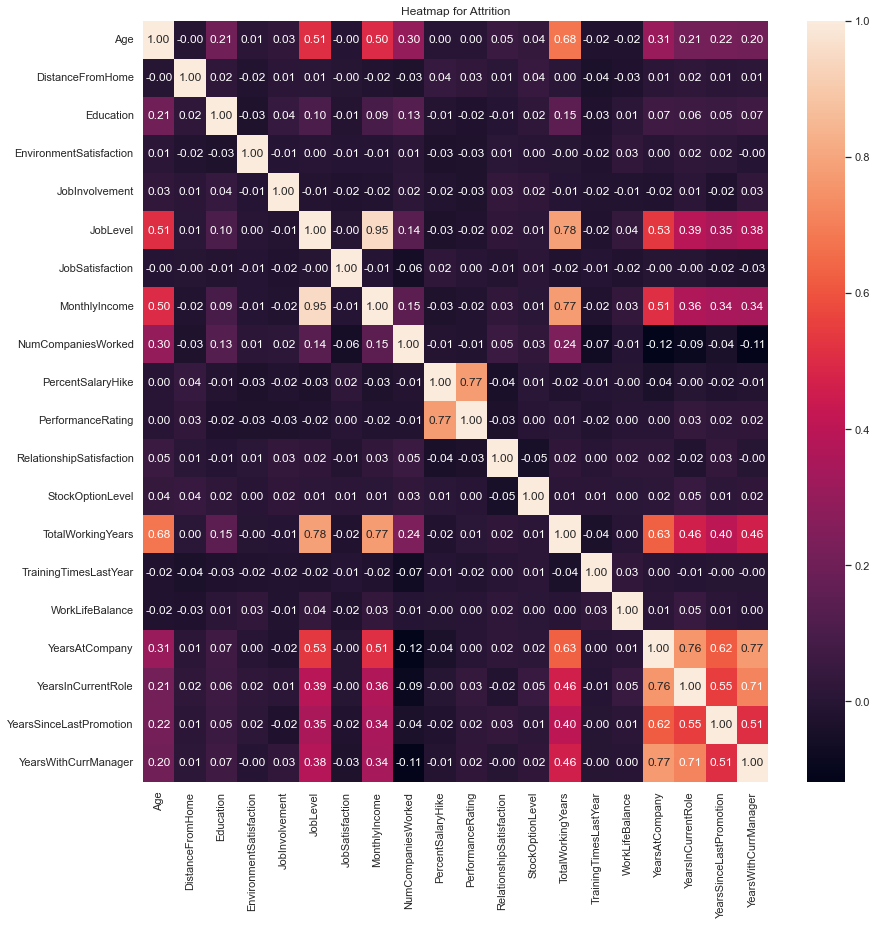

In [43]:
# Plotting heatmap for Attrition
plt.figure(figsize=[14,14])
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Heatmap for Attrition');

## Answer: 
# From the Heatmap above, it can be concluded that:
1. Monthly Income
2. Total Working years
3. Job level 

are responsible for employee attrition because they have the highest value.

## Question 2:

What is the relationship between Education and Monthly Income?

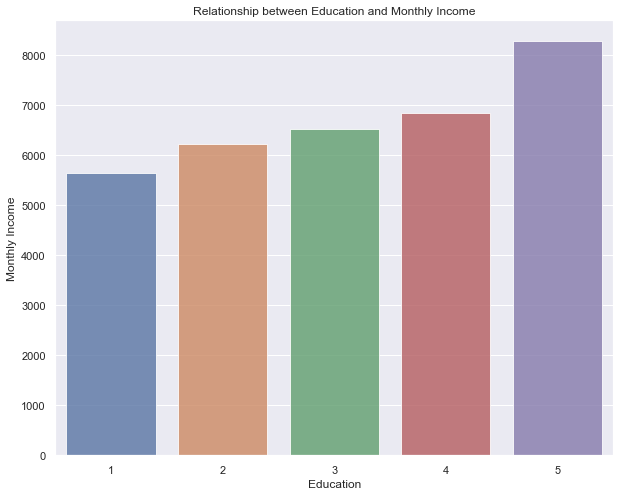

In [69]:
# Relationship between Education and Monthly Income

ax = sns.barplot(data=df, x='Education', y='MonthlyIncome',ci=None, alpha=0.8 )
ax.set_title('Relationship between Education and Monthly Income')
ax.set_xlabel('Education')
ax.set_ylabel('Monthly Income');

## Answer:

The relationship on the chart indicates
that the higher the Educational level the higher the Monthly Income. 

This implies that Education has an effect on Monthly Income.

It should be noted that:

1 = Below College
2= College
3 = Bachelor
4 = Master
5 = Doctor

## Question 3:

What is the effect of age on attrition?

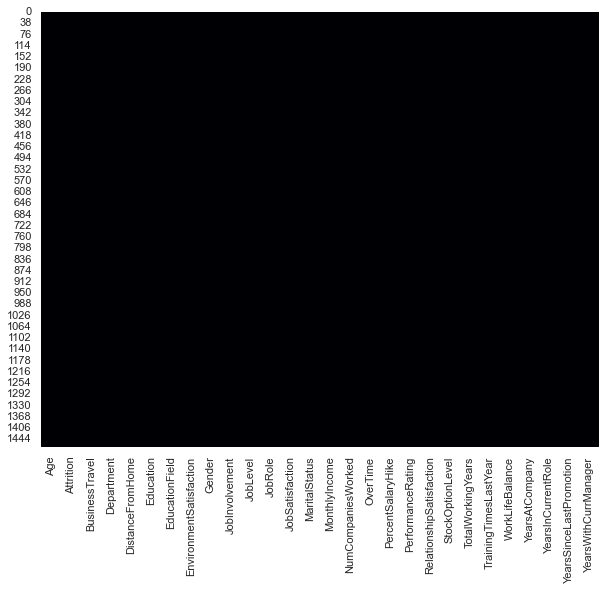

In [87]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

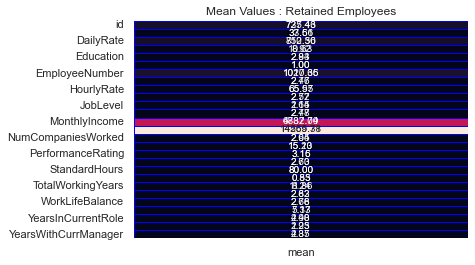

In [98]:
yes = df[df['Attrition'] == 'Yes'].describe().T
no = df[df['Attrition'] == 'No'].describe().T



sns.heatmap(yes[['mean']],annot = True,linewidths = 0.5,linecolor = 'blue',cbar = False,fmt = '.2f')
plt.title('Mean Values : Attrited Employees');


sns.heatmap(no[['mean']],annot = True,linewidths = 0.5,linecolor = 'blue',cbar = False,fmt = '.2f')
plt.title('Mean Values : Retained Employees');



Text(0.5, 1.0, 'Effect of Age on Attrition')

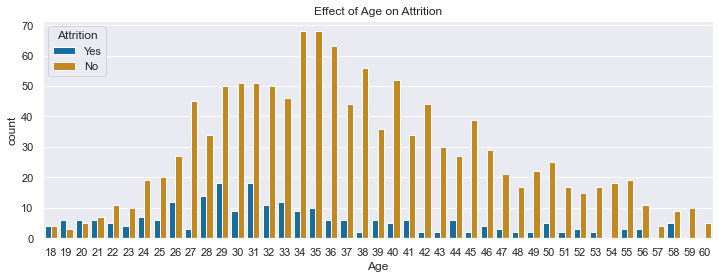

In [99]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Age", hue="Attrition", data=df, palette="colorblind")
plt.title('Effect of Age on Attrition')

## Answer:

The blue colour signifies those that stayed(No) while the gold colour signifies those that left(Yes). 

It can be observed that more employees left between the age of 34 and 35. 

The chart of the employees that left is also postively skewed.

It can also be observed that employees left at various age and as such people can leave their place of work at any age.

## Question 4

Is Income the main factor in Employee Attrition?



Text(0.5, 1.0, 'Distribution of Employees Income')

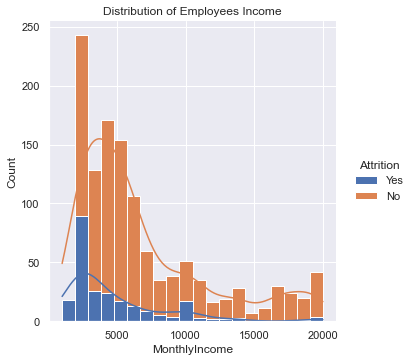

In [113]:
# Distribution of Employees Income

sns.displot(x='MonthlyIncome',data=df, hue = 'Attrition', color = 'g', alpha =1.0, kde=True)
plt.title('Distribution of Employees Income')

## Answer:

The chart shows that monthly income is a major factor of attrition as a higher number of employee left the work compared to those who stayed.

It is also positively skewed

## Question 5:

How does work life balance impact the overall attrition?

In [117]:
var = df['WorkLifeBalance'].value_counts().index
var

Int64Index([3, 2, 4, 1], dtype='int64')

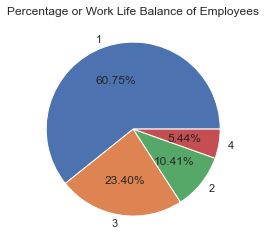

In [123]:
# Plotting for Percentage or Work Life Balance of Employees

count =df['WorkLifeBalance'].value_counts()
label = df['WorkLifeBalance'].unique()
plt.pie(count, labels=label, autopct='%.2f%%')
plt.title('Percentage or Work Life Balance of Employees');

## Answer

The Pie chart distribution shows that Better work life balance has the highest percentage of 60.75%, followed by Best which is 23.40% with Bad having 5.44%. This shows that majority of the employees have better work-life balance.


Where the numbers of the pie chart indicates:

1. Better
2. Good
3. Best
4. Bad

This implies that the employees work life does not necesarily affect attrition 